In [7]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import tensorflow as tf

In [2]:
DIR=r'E:\foliar disease in apple trees\images\original'

In [3]:
train=pd.read_csv(r'E:\foliar disease in apple trees\labels\train.csv')
test=pd.read_csv(r'E:\foliar disease in apple trees\labels\test.csv')

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


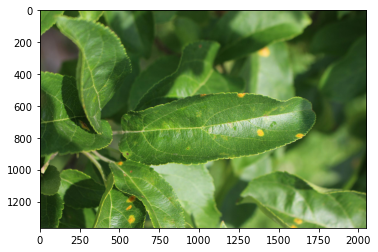

In [6]:
image1=Image.open(r'E:\foliar disease in apple trees\images\original\Test_0.jpg')
plt.imshow(image1)
plt.show()


In [7]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [8]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1



In [9]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [10]:
DIR

'E:\\foliar disease in apple trees\\images\\original'

In [11]:
os.listdir(DIR)

['Test_0.jpg',
 'Test_1.jpg',
 'Test_10.jpg',
 'Test_100.jpg',
 'Test_1000.jpg',
 'Test_1001.jpg',
 'Test_1002.jpg',
 'Test_1003.jpg',
 'Test_1004.jpg',
 'Test_1005.jpg',
 'Test_1006.jpg',
 'Test_1007.jpg',
 'Test_1008.jpg',
 'Test_1009.jpg',
 'Test_101.jpg',
 'Test_1010.jpg',
 'Test_1011.jpg',
 'Test_1012.jpg',
 'Test_1013.jpg',
 'Test_1014.jpg',
 'Test_1015.jpg',
 'Test_1016.jpg',
 'Test_1017.jpg',
 'Test_1018.jpg',
 'Test_1019.jpg',
 'Test_102.jpg',
 'Test_1020.jpg',
 'Test_1021.jpg',
 'Test_1022.jpg',
 'Test_1023.jpg',
 'Test_1024.jpg',
 'Test_1025.jpg',
 'Test_1026.jpg',
 'Test_1027.jpg',
 'Test_1028.jpg',
 'Test_1029.jpg',
 'Test_103.jpg',
 'Test_1030.jpg',
 'Test_1031.jpg',
 'Test_1032.jpg',
 'Test_1033.jpg',
 'Test_1034.jpg',
 'Test_1035.jpg',
 'Test_1036.jpg',
 'Test_1037.jpg',
 'Test_1038.jpg',
 'Test_1039.jpg',
 'Test_104.jpg',
 'Test_1040.jpg',
 'Test_1041.jpg',
 'Test_1042.jpg',
 'Test_1043.jpg',
 'Test_1044.jpg',
 'Test_1045.jpg',
 'Test_1046.jpg',
 'Test_1047.jpg',
 'Tes

In [12]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [13]:
def get_label_img(img):
    if search('Train',img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [14]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in images:
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        
        if search('Train',img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'E:\foliar disease in apple trees\images\train\healthy')
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'E:\foliar disease in apple trees\images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'E:\foliar disease in apple trees\images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'E:\foliar disease in apple trees\images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'E:\foliar disease in apple trees\images\test')

In [15]:
shutil.os.mkdir(r'E:\foliar disease in apple trees\images\train')
shutil.os.mkdir(r'E:\foliar disease in apple trees\images\train\healthy')
shutil.os.mkdir(r'E:\foliar disease in apple trees\images\train\multiple_disease')
shutil.os.mkdir(r'E:\foliar disease in apple trees\images\train\rust')
shutil.os.mkdir(r'E:\foliar disease in apple trees\images\train\scab')

shutil.os.mkdir(r'E:\foliar disease in apple trees\images\test')

In [16]:
create_train_data()

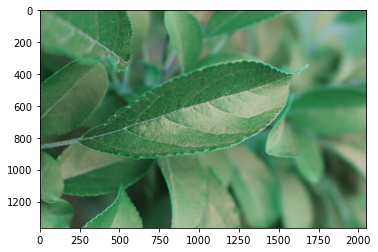

In [8]:
Train_DIR=r'E:\foliar disease in apple trees\images\train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break
    

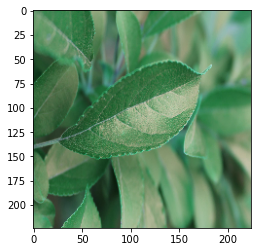

In [9]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [11]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

In [12]:
train_datagen=datagen.flow_from_directory(r'E:\foliar disease in apple trees\images\train',
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='training')

Found 1458 images belonging to 4 classes.


In [13]:
val_datagen=datagen.flow_from_directory(r'E:\foliar disease in apple trees\images\train',
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation')

Found 363 images belonging to 4 classes.


In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))


In [18]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [19]:
checkpoint=ModelCheckpoint(r'E:\foliar disease in apple trees\model\apple.h5',monitor='val_loss',mode='min',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [20]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2658 - accuracy: 0.3079
Epoch 00001: val_loss improved from inf to 1.25151, saving model to E:\foliar disease in apple trees\model\apple.h5
91/91 [==============================] - 165s 2s/step - loss: 1.2658 - accuracy: 0.3079 - val_loss: 1.2515 - val_accuracy: 0.3295
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2437 - accuracy: 0.3301
Epoch 00002: val_loss improved from 1.25151 to 1.23780, saving model to E:\foliar disease in apple trees\model\apple.h5
91/91 [==============================] - 148s 2s/step - loss: 1.2437 - accuracy: 0.3301 - val_loss: 1.2378 - val_accuracy: 0.3381
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2344 - accuracy: 0.3571
Epoch 00003: val_loss improved from 1.23780 to 1.17178, saving model to E:\foliar disease in apple trees\model\apple.h5
91/91 [===================

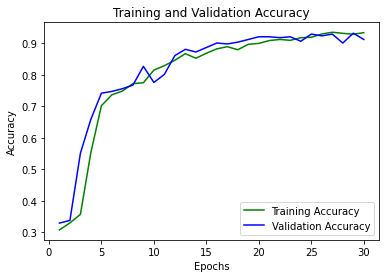

In [21]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

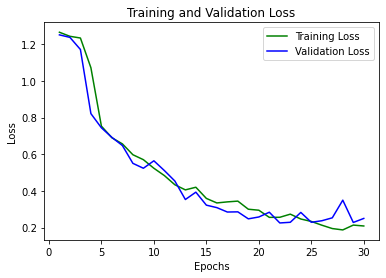

In [22]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2


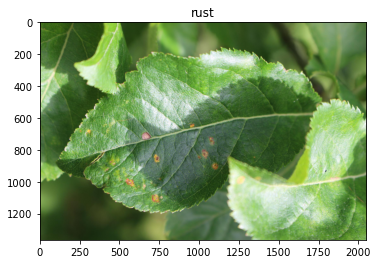

In [24]:
test_image=r'E:\foliar disease in apple trees\images\test\Test_1.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()